In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
path = 'https://raw.githubusercontent.com/RajkumarGalaxy/dataset/master/Tabular/bulb_life.csv'
data = pd.read_csv(path)
data.head(10) 

,bulb,life
0,1,31
1,2,33
2,3,34
3,4,51
4,5,24
5,6,41
6,7,58
7,8,53
8,9,27
9,10,52


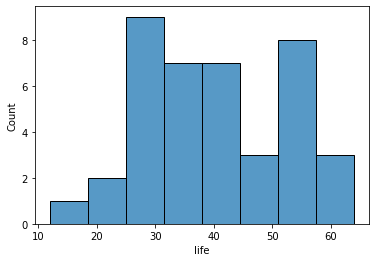

In [3]:
sns.histplot(data=data, x='life', bins=8)
plt.show()

In [4]:
# mean and standard deviation of given data
mean = np.mean(data['life'])
std = np.std(data['life'])
bins = 8
interval = []
for i in range(1,9):
    val = stats.norm.ppf(i/bins, mean, std)
    interval.append(val)
interval 

[26.056476255663902,
 31.762378497044118,
 36.02928282685201,
 39.85,
 43.67071717314799,
 47.937621502955885,
 53.6435237443361,
 inf]

In [5]:
interval.insert(0, -np.inf)
interval

[-inf,
 26.056476255663902,
 31.762378497044118,
 36.02928282685201,
 39.85,
 43.67071717314799,
 47.937621502955885,
 53.6435237443361,
 inf]

In [6]:
df = pd.DataFrame({'lower_limit':interval[:-1], 'upper_limit':interval[1:]})
df 

,lower_limit,upper_limit
0,-inf,26.056476
1,26.056476,31.762378
2,31.762378,36.029283
3,36.029283,39.850000
4,39.850000,43.670717
5,43.670717,47.937622
6,47.937622,53.643524
7,53.643524,inf


In [7]:
life_values = list(sorted(data['life']))
df['obs_freq'] = df.apply(lambda x:sum([i>x['lower_limit'] and i<=x['upper_limit'] for i in life_values]), axis=1)
df['exp_freq'] = 5
df 

,lower_limit,upper_limit,obs_freq,exp_freq
0,-inf,26.056476,4,5
1,26.056476,31.762378,8,5
2,31.762378,36.029283,6,5
3,36.029283,39.850000,2,5
4,39.850000,43.670717,6,5
5,43.670717,47.937622,2,5
6,47.937622,53.643524,6,5
7,53.643524,inf,6,5


In [8]:
stats.chisquare(df['obs_freq'], df['exp_freq'])


Power_divergenceResult(statistic=6.4, pvalue=0.4938946499688296)

In [9]:
p = 2    # number of parameters
DOF = len(df['obs_freq']) - p -1
stats.chi2.ppf(0.95, DOF)

11.070497693516351